In [23]:
!pip install autograd

In [24]:
import autograd.numpy as np
from autograd import grad,elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt

In [25]:
## function for sigmoid fucntion
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [26]:
# the neural network with one input, one hidden and one output layer..
def neural_network(params,x):
    w_hidden = params[0]
    w_output = params[1]
    
    num_values = np.size(x)
    x = x.reshape(-1,num_values)
    ###
    # Example:
    #x = np.array([1, 2, 3, 4, 5, 6])  # Example array with 6 elements
    #num_values = 2
    # Reshape x into a 3x2 array
    #x_reshaped = x.reshape(-1, num_values)
    #print(x_reshaped)
    #[[1 2]
    #[3 4]
    #[5 6]]
    ###
    x_input = x
    
    ##Hidden layer:
    
    #Add a row of ones to add bias
    x_input = np.concatenate((np.ones((1,num_values)),x_input),axis = 0)
    
    z_hidden = np.matmul(w_hidden,x_input)
    x_hidden = sigmoid(z_hidden)
    
    ##output layer:
    
    #include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)
    
    z_output = np.matmul(w_output,x_hidden)
    x_output = z_output
    return x_output

In [27]:
def g_trial(x,params,g0=10):
    return g0 + x*neural_network(params,x)

In [28]:
def g(x,g_trial,gamma=2):
    return -gamma*g_trial

In [29]:
def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

In [30]:
def cost_function(P,x):
    #Evaluate the trial fucntion with the current parameters P
    g_t = g_trial(x,P)
    
    #Find the derivative w.r.t x of the trial fucntion
    d_g_t = elementwise_grad(g_trial,0)(x,P) ##...?
    
    #The right side of ODE
    func = g(x,g_t)
    
    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)
    
    return cost_sum/np.size(err_sqr)
    #...

In [31]:
## to solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x,num_neurons_hidden,num_itr,lmb):
    ## set up the initial weights and biases
    
    ## For the hidden layer....generating both biases nd weights
    p0 = npr.randn(num_neurons_hidden,2)
    ## for the output layer
    p1 = npr.randn(1,num_neurons_hidden+1)
    # +1 since bias is included
    
    P = [p0,p1]
    print('Initial cost: %g'%cost_function(P,x))
    
    ##start finding the optimal weights using gradient descent
    
    cost_function_grad = grad(cost_function,0)
    
    for i in range(num_itr):
        cost_grad = cost_function_grad(P,x)
        P[0] = P[0] - lmb*cost_grad[0]
        P[1] = P[1] - lmb*cost_grad[1]
    print('Final cost: %g'%cost_function(P,x))
    return P
    #....

In [32]:
def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

Initial cost: 366.13
Final cost: 2.17888
Max absolute difference: 0.463193


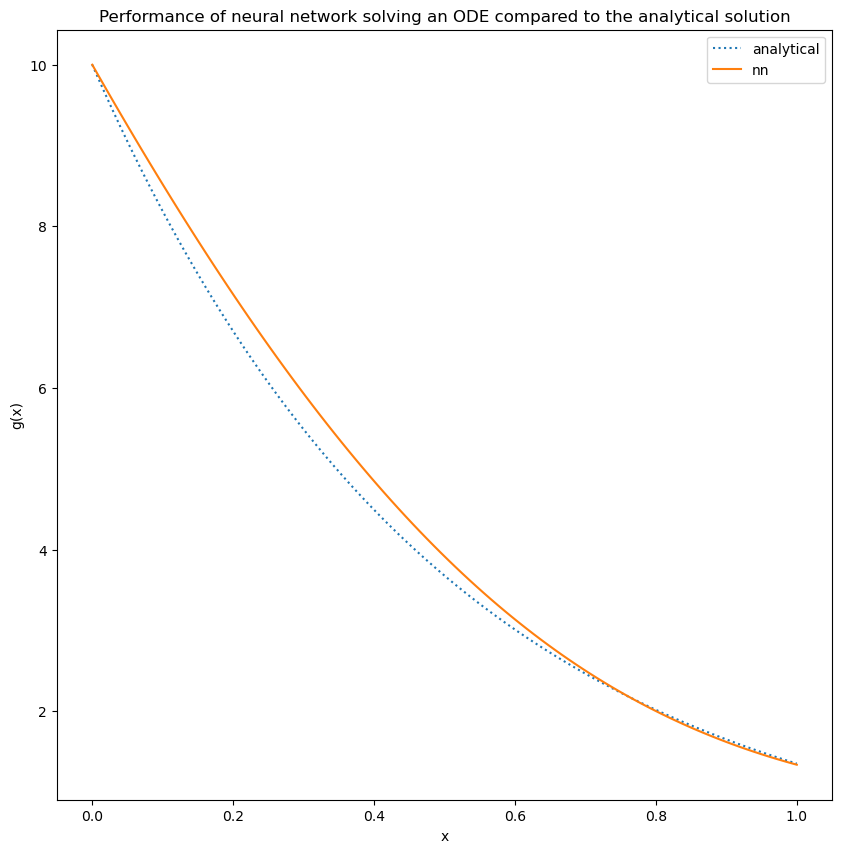

In [33]:
if __name__ == '__main__':
    ## ???....
    ## set seed such that the weights are initialized with the same weights and biases \
    ## for every run
    npr.seed(15)
    
    ##to fill the arguments to the function
    N = 100;
    x = np.linspace(0,1,N);
    # x contains values from 0-1 equally spaced acc to the size of vector..i.e. N
    
    ##set up the initial parameters
    num_hidden_neurons = 10
    num_itr = 1000
    lmb = 0.001 ##...?
    
    ##Use the network
    P = solve_ode_neural_network(x,num_hidden_neurons,num_itr,lmb)
    
    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

    # Plot the results
    plt.figure(figsize=(10,10))

    plt.title('Performance of neural network solving an ODE compared to the analytical solution')
    plt.plot(x, res_analytical,linestyle=':')
    plt.plot(x, res[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()
    #...